In [49]:
import pandas as pd
file_path = r"C:\Users\Home\OneDrive\Рабочий стол\Python\Лаб 3\En_In.xls"

# Завдання 1
Energy = pd.read_excel(file_path, skiprows=17, usecols=[1, 3, 4, 5], nrows=227)
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Завдання 2
Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply'], errors='coerce') * 1_000_000

# Завдання 3
replace_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
Energy['Country'] = Energy['Country'].replace(replace_dict)

# Завдання 4
Energy['Country'] = Energy['Country'].str.replace(r"\(.*\)", "", regex=True)
Energy['Country'] = Energy['Country'].str.replace(r"\d+", "", regex=True).str.strip()

res = Energy.loc[Energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])].copy()

def format_numeric(value, decimals=0):
    """Перевірка типу і форматування чисел"""
    if pd.notnull(value) and isinstance(value, (int, float)):
        return f"{value:,.{decimals}f}"
    else:
        return "nan"

res['Energy Supply'] = res['Energy Supply'].apply(lambda x: format_numeric(x, 0))
res['Energy Supply per Capita'] = res['Energy Supply per Capita'].apply(lambda x: format_numeric(x, 3))
res['% Renewable'] = res['% Renewable'].apply(lambda x: format_numeric(x, 3))

res.index = res.index + 1
print(res.to_string(index=True))

            Country   Energy Supply Energy Supply per Capita % Renewable
4    American Samoa             nan                      nan       0.641
25          Bolivia     336,000,000                   32.000      31.477
165     South Korea  11,007,000,000                  221.000       2.279


In [50]:
import pandas as pd
file_path = r"C:\Users\Home\OneDrive\Рабочий стол\Python\Лаб 3\gpd.csv"

GPD = pd.read_csv(file_path, skiprows=4)

replace_dict = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
GPD['Country Name'] = GPD['Country Name'].replace(replace_dict)

selected_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
                    '2006', '2007', '2008', '2009', '2010', '2011', '2012']
GPD = GPD[selected_columns]

GPD.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code',
                    '2006', '2007', '2008', '2009', '2010', '2011', '2012']

print(GPD.head(1).to_string(index=False))

Country Country Code                           Indicator Name Indicator Code  2006  2007  2008  2009         2010  2011  2012
  Aruba          ABW GDP at market prices (constant 2010 US$) NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN 2.467704e+09   NaN   NaN


In [51]:
import pandas as pd
file_path = r"C:\Users\Home\OneDrive\Рабочий стол\Python\Лаб 3\scimagojr.xlsx"

scimago_data = pd.read_excel(file_path)
print(scimago_data.head())

   Rank             Country  Documents  Citable documents  Citations  \
0     1               China     127050             126767     597237   
1     2       United States      96661              94747     792274   
2     3               Japan      30504              30287     223024   
3     4      United Kingdom      20944              20357     206091   
4     5  Russian Federation      18534              18301      34266   

   Self-citations  Citations per document  H index  
0          411683                    4.70      138  
1          265436                    8.20      230  
2           61554                    7.31      134  
3           37874                    9.84      139  
4           12422                    1.85       57  


In [69]:
import pandas as pd
file_energy = r"C:\Users\Home\OneDrive\Рабочий стол\Python\Лаб 3\En_In.xls"
Energy = pd.read_excel(file_energy, skiprows=17, usecols=[1, 3, 4, 5], nrows=227)
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply'], errors='coerce') * 1_000_000

replace_dict_energy = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
Energy['Country'] = Energy['Country'].replace(replace_dict_energy)
Energy['Country'] = Energy['Country'].str.replace(r"\(.*\)", "", regex=True)
Energy['Country'] = Energy['Country'].str.replace(r"\d+", "", regex=True).str.strip()

file_gdp = r"C:\Users\Home\OneDrive\Рабочий стол\Python\Лаб 3\gpd.csv"
GDP = pd.read_csv(file_gdp, skiprows=4)
replace_dict_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
GDP['Country Name'] = GDP['Country Name'].replace(replace_dict_gdp)
GDP = GDP[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

file_scimago = r"C:\Users\Home\OneDrive\Рабочий стол\Python\Лаб 3\scimagojr.xlsx"
Scimago = pd.read_excel(file_scimago)
Scimago = Scimago.iloc[:15]  
merged_data = pd.merge(Scimago, Energy, on='Country', how='inner')
Result = pd.merge(merged_data, GDP, on='Country', how='inner')

columns_order = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
                 '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

Result = Result[columns_order]
Result.set_index('Country', inplace=True)
pd.options.display.float_format = '{:,.3f}'.format

print(Result.head(3)) 
print(Result.shape)  

               Rank  Documents  Citable documents  Citations  Self-citations  \
Country                                                                        
China             1     127050             126767     597237          411683   
United States     2      96661              94747     792274          265436   
Japan             3      30504              30287     223024           61554   

               Citations per document  H index       Energy Supply  \
Country                                                              
China                           4.700      138 127,191,000,000.000   
United States                   8.200      230  90,838,000,000.000   
Japan                           7.310      134  18,984,000,000.000   

              Energy Supply per Capita  % Renewable                   2006  \
Country                                                                      
China                               93       19.755  3,992,331,462,570.890   
United States 

In [73]:
def task_eight():
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    Result['avgGDP'] = Result[gdp_columns].mean(axis=1)
    sorted_result = Result['avgGDP'].sort_values(ascending=False)
    return sorted_result

avg_gdp = task_eight()
print(avg_gdp)


Country
United States        15,364,344,302,990.000
China                 6,348,608,932,836.100
Japan                 5,542,207,638,235.176
Germany               3,493,025,339,072.848
France                2,681,724,635,761.589
United Kingdom        2,487,906,661,418.417
Brazil                2,189,794,143,774.905
Italy                 2,120,175,089,933.776
India                 1,769,297,396,603.860
Canada                1,660,647,466,307.512
Russian Federation    1,565,459,478,480.661
Spain                 1,418,078,278,145.694
Australia             1,164,042,729,991.427
South Korea           1,106,714,508,244.852
Iran                    444,155,754,051.095
Name: avgGDP, dtype: float64


In [74]:
def task_nine():
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    Result['avgGDP'] = Result[gdp_columns].mean(axis=1)
    sorted_result = Result.sort_values(by='avgGDP', ascending=False)
    fifth_country = sorted_result.iloc[4]
    country_name = fifth_country.name
    gdp_change = Result.loc[country_name, '2015'] - Result.loc[country_name, '2006']
    return (country_name, gdp_change)

result = task_nine()
print(result)

('France', 153345695364.24023)


In [75]:
def task_ten():
    max_renewable_row = Result['% Renewable'].idxmax()
    country_name = max_renewable_row
    max_renewable_value = Result.loc[max_renewable_row, '% Renewable']
    return (country_name, max_renewable_value)

result = task_ten()
print(result)

('Brazil', 69.64803)


In [76]:
def task_eleven():
    Result['Estimated Population'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    sorted_population = Result['Estimated Population'].sort_values(ascending=False)
    sixth_country = sorted_population.index[5]
    sixth_population = sorted_population.iloc[5]
    return (sixth_country, sixth_population)

result = task_eleven()
print(result)

('Japan', 127409395.97315437)


In [77]:
def task_twelve():
    Result['Citable documents per Capita'] = Result['Citable documents'] / Result['Estimated Population']
    correlation = Result['Citable documents per Capita'].corr(Result['Energy Supply per Capita'])
    return correlation

result = task_twelve()
print(result)

0.7940010435442946


In [78]:
def task_thirteen():
    median_value = Result['% Renewable'].median()
    Result['HighRenew'] = (Result['% Renewable'] >= median_value).astype(int)
    sorted_result = Result.sort_values(by='Rank')['HighRenew']
    return sorted_result

result = task_thirteen()
print(result)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32


In [107]:
def task_forteen():
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }
    Result['Continent'] = Result.index.map(ContinentDict)
    Result['Population'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    grouped = Result.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    return grouped
    
result = task_forteen()
print(result)

               size               sum            mean             std
Continent                                                            
Asia              5 2,898,666,386.611 579,733,277.322 679,097,888.366
Australia         1    23,316,017.316  23,316,017.316             NaN
Europe            6   457,929,667.216  76,321,611.203  34,647,667.066
North America     2   352,855,249.480 176,427,624.740 199,669,644.857
South America     1   205,915,254.237 205,915,254.237             NaN


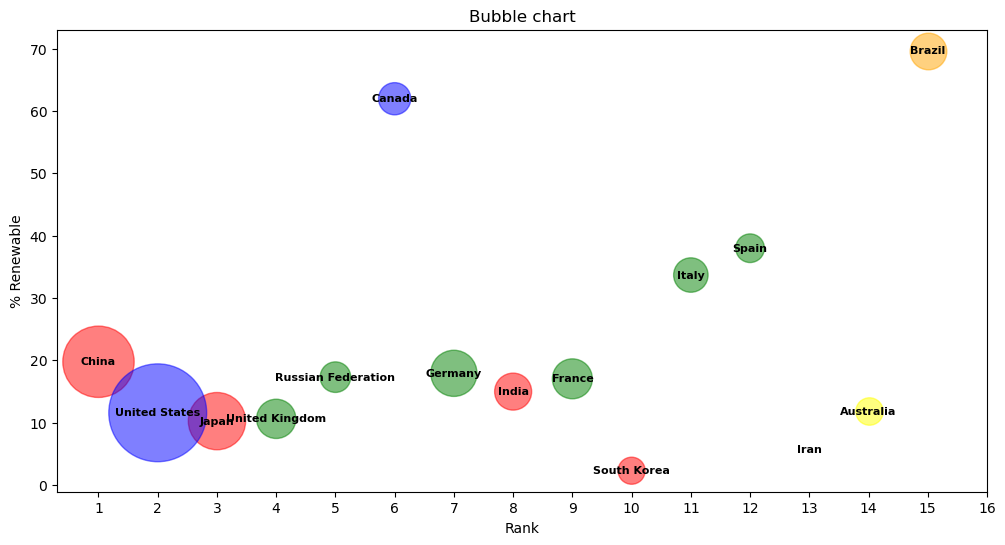

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

Result['Continent'] = Result.index.map(ContinentDict)
colors = {
    'Asia': 'red',
    'Europe': 'green',
    'North America': 'blue',
    'South America': 'orange',
    'Australia': 'yellow'
}

plt.figure(figsize=(12, 6))
for continent, color in colors.items():
    subset = Result[Result['Continent'] == continent]
    plt.scatter(
        subset['Rank'], 
        subset['% Renewable'], 
        s=subset['2015'] / 1e10 * 3, 
        c=color, 
        alpha=0.5, 
        label=continent
    )

for i, country in enumerate(Result.index):
    plt.text(
        Result.iloc[i]['Rank'], 
        Result.iloc[i]['% Renewable'], 
        country, 
        fontsize=8, 
        ha='center', 
        va='center',  
        color='black', 
        weight='bold'
    )
    
plt.title('Bubble chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.xticks(range(1, len(Result['Rank']) + 2))

plt.show()